## Prerequisites

In [1]:
!pip install keras

In [2]:
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


## Load Dataset

In [3]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize

[5 0 4 1 9 2 1 3 1 4]


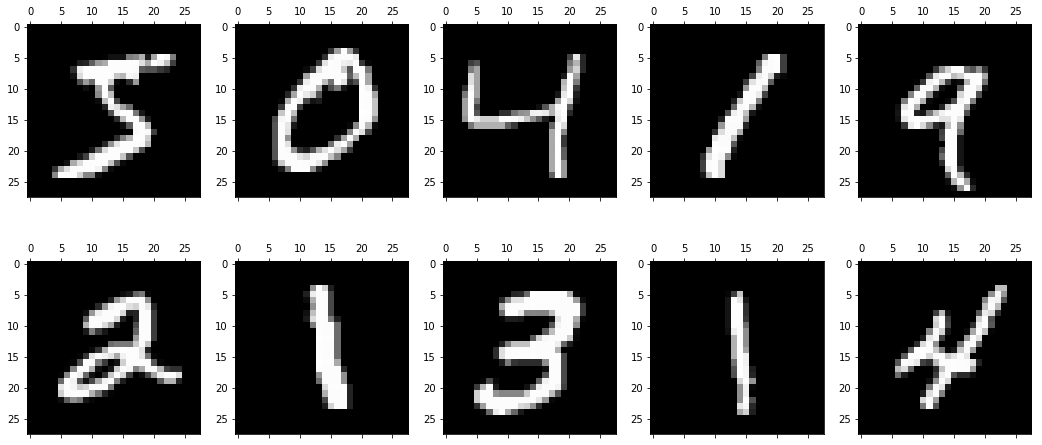

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Single-layer & Multi-layer Neural Network

### Preprocessing

In [5]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [6]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


### Build a Single-layer Neural Network

In [21]:
# Write your code here!
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.initializers import RandomUniform

model = Sequential()
model.add(Dense(units=10 , 
                kernal_initializer=RandomUniform(minval=0.0, maxval=0.001), 
                activation ='sigmoid',
                input_shape=(28*28,)))

optimizer = SGD(lr=0.00001)
model.compile(optimizer = 'sgd' ,
              loss='categorical_crossentropy')


TypeError: ('Keyword argument not understood:', 'kernal_initializer')

In [19]:
model.fit(X_train , 
         y_train_hot, 
         epochs = 20 , 
         validation_data = (X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/step - loss: 2.3823 - val_loss: 2.2704
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 2.2482 - val_loss: 2.2305
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 2.2295 - val_loss: 2.2248
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 2.2334 - val_loss: 2.2329
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 2.2331 - val_loss: 2.2398
Epoch 6/20
60000/60000 [==============================] - 2s 32us/step - loss: 2.2201 - val_loss: 2.2120
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 2.2112 - val_loss: 2.2218
Epoch 8/20
60000/60000 [==============================] - 2s 32us/step - loss: 2.2131 - val_loss: 2.1921
Epoch 9/20
60000/60000 [==============================] - 2s 32us/step - loss: 2.1953 - val_loss: 2.2089
Epoch

### Build a Multi-layer Neural Network

In [40]:
# Write your code here!
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.initializers import RandomUniform

optimizer = SGD(lr=0.00001)

model = Sequential()
model.add(Dense(units = 1000,
               activation='sigmoid', input_shape=(28*28,)))
               
model.add(Dense(units=10 , activation='sigmoid'))
model.compile(optimizer)


model.compile(optimizer = 'sgd' ,
              loss='categorical_crossentropy', 
              mrtrics=['accuracy'] )




TypeError: compile() missing 1 required positional argument: 'loss'

In [36]:
model.fit(X_train , y_train_hot , epochs=30, validation_data=(X_test, y_test_hot))

TypeError: Unrecognized keyword arguments: {'epoch': 30}

## Convolutional Neural Network

## Preprocessing

In [57]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## Build a Model

### Convolutional Neural Network

In [73]:
# Write your code here!

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D , Flatten , Dense

model = Sequential()

model.add(Conv2D(
        filters = 6,
        kernel_size=(5,5), 
        kernel_initializer = 'random_uniform', 
        activation='sigmoid',
        input_shape=(28,28,1)))


model.add(MaxPooling2D(pool_size =(2,2) , strides=(2,2)))

model.add(Conv2D(
        filters = 12,
        kernel_size=(5,5), 
        kernel_initializer = 'random_uniform', 
        activation='sigmoid',
        input_shape=(28,28,1)))


model.add(MaxPooling2D(pool_size =(2,2) , strides=(2,2)))

model.add(Flatten())

model.add(Dense(
                 units=128,
                 kernel_initializer = 'random_uniform', 
                 activation='sigmoid'))

model.add(Dense(
                 units=10,
                 kernel_initializer = 'random_uniform', 
                 activation='sigmoid'))

from keras.optimizers import SGD

optimizer = SGD(lr=0.1)

model.compile(optimizer = optimizer , 
             loss    = 'categorical_crossentropy' ,
             metrics =['accuracy'])



In [75]:
model.fit(X_train , y_train_hot , epochs=30 , validation_data = (X_test , y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 305us/step - loss: 2.3027 - acc: 0.1110 - val_loss: 2.3004 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 18s 296us/step - loss: 2.0344 - acc: 0.2670 - val_loss: 0.7826 - val_acc: 0.7656
Epoch 3/30
60000/60000 [==============================] - 18s 295us/step - loss: 0.4075 - acc: 0.8816 - val_loss: 0.2089 - val_acc: 0.9406
Epoch 4/30
60000/60000 [==============================] - 18s 300us/step - loss: 0.1929 - acc: 0.9424 - val_loss: 0.1681 - val_acc: 0.9475
Epoch 5/30
60000/60000 [==============================] - 18s 293us/step - loss: 0.1401 - acc: 0.9575 - val_loss: 0.1202 - val_acc: 0.9636
Epoch 6/30
60000/60000 [==============================] - 19s 315us/step - loss: 0.1150 - acc: 0.9644 - val_loss: 0.0927 - val_acc: 0.9712
Epoch 7/30
60000/60000 [==============================] - 17s 286us/step - loss: 0.1009 - acc: 0.9690 - val_loss: 0.